In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.layers import Input, Dense
from keras.models import Model

In [2]:
fraud_df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
fraud_df.shape

(3709072, 11)

In [4]:
fraud_df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [5]:
fraud_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,3.709072e+06,3.709072e+06,3.709072e+06,3.709071e+06,3.709071e+06,3.709071e+06,3.709071e+06,3.709071e+06
mean,1.487790e+02,1.559568e+05,8.388609e+05,8.602865e+05,9.929668e+05,1.095552e+06,8.473820e-04,5.392186e-07
std,8.537865e+01,2.920663e+05,2.905391e+06,2.941777e+06,2.304343e+06,2.390923e+06,2.909749e-02,7.343149e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.300000e+01,1.237080e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.640000e+02,7.508470e+04,1.455600e+04,0.000000e+00,1.361970e+05,2.204734e+05,0.000000e+00,0.000000e+00
75%,2.140000e+02,2.086742e+05,1.111736e+05,1.500291e+05,9.388235e+05,1.114766e+06,0.000000e+00,0.000000e+00
max,2.770000e+02,9.244552e+07,3.893942e+07,3.894623e+07,9.701472e+07,1.500147e+08,1.000000e+00,1.000000e+00


In [6]:
fraud_df.columns.values.tolist()

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction.

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction

In [7]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709072 entries, 0 to 3709071
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 311.3+ MB


In [8]:
fraud_df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [9]:
fraud_df = fraud_df.dropna()

In [10]:
fraud_df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

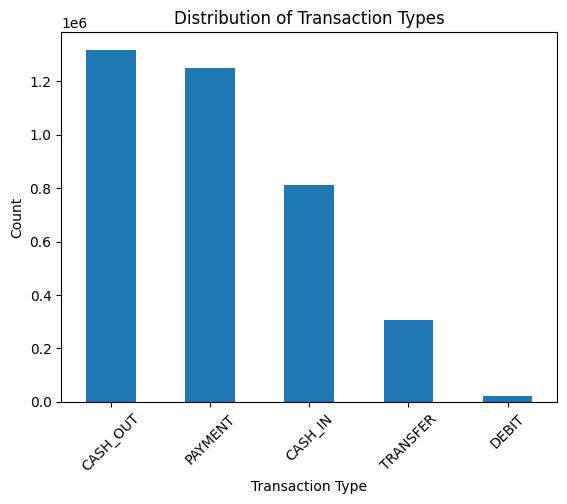

In [12]:
fraud_df['type'].value_counts().plot(kind='bar', rot=45)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [13]:
import seaborn as sns

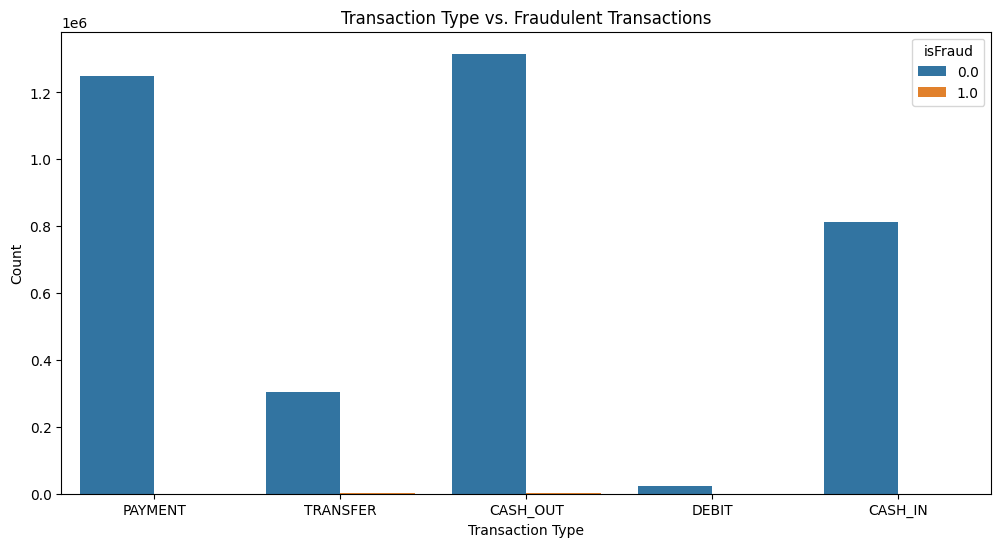

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='type', hue='isFraud', data=fraud_df)
plt.title('Transaction Type vs. Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


In [15]:
fraud_count = fraud_df['isFraud'].sum()
print(f'Count of Fraud Records (isFraud=1): {fraud_count}')

Count of Fraud Records (isFraud=1): 3143.0


In [16]:
flagged_fraud_count = fraud_df['isFlaggedFraud'].sum()
print(f'Count of Fraud Records (isFlaggedFraud=1): {fraud_count}')


Count of Fraud Records (isFlaggedFraud=1): 3143.0


In [17]:
# select the important features for pca (numerical or float)
features = fraud_df.select_dtypes(include=['float64', 'int64']).drop(['isFraud'], axis=1)

In [18]:
# standardizing features for pca
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [96]:
param_grid = {
    'n_components': [0.9, 0.95, 0.99]
}

In [98]:
# pca
pca = PCA()
grid_search = GridSearchCV(pca, param_grid=param_grid)
grid_search.fit(scaled_features)

GridSearchCV(estimator=PCA(), param_grid={'n_components': [0.9, 0.95, 0.99]})

In [99]:
num_components = grid_search.best_estimator_.n_components
print(f"Best n_components: {num_components}")

Best n_components: 0.95


In [102]:
pca=PCA(n_components=num_components)
pca_result = pca.fit_transform(scaled_features) #retraining pca with best num components

In [104]:
# calc explained variance for each pc
explained_variance_ratio = pca.explained_variance_ratio_

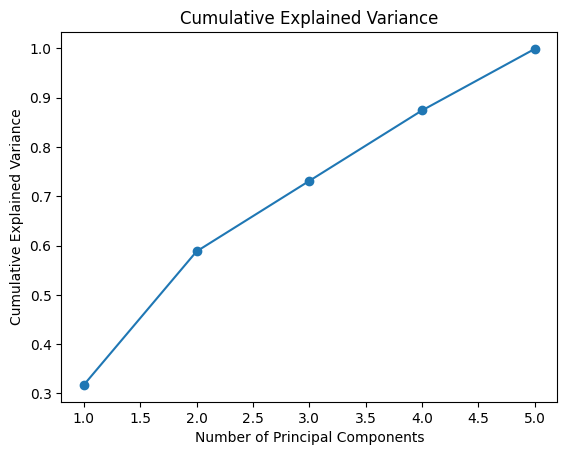

In [105]:
# plot
cumulative_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [106]:
# determining components from pca analysis based on desired variance
desired_explained_variance = 0.95
num_components = sum(cumulative_variance < desired_explained_variance) + 1

In [108]:
"""# retrain PCA
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(scaled_features)"""

'# retrain PCA\npca = PCA(n_components=num_components)\npca_result = pca.fit_transform(scaled_features)'

In [109]:

# df with pca components
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, num_components + 1)])

In [110]:

# Concatenate the principal components with the original DataFrame
final_df = pd.concat([pca_df, fraud_df[['isFraud']]], axis=1)

In [111]:
# Display the results
print(f'Number of Principal Components: {num_components}')
print(pca_df.head())


Number of Principal Components: 5
        PC1       PC2       PC3       PC4       PC5
0 -0.785220 -0.177329  1.699245 -0.077688 -0.458137
1 -0.831933 -0.125777  1.696982 -0.079231 -0.486640
2 -0.838936 -0.119006  1.696478 -0.079545 -0.492443
3 -0.833846 -0.115714  1.696118 -0.079692 -0.495059
4 -0.819391 -0.124582  1.700183 -0.077521 -0.454946


In [27]:
pca_result

array([[-0.78521969, -0.17732855,  1.69924515, -0.07768843, -0.4581365 ],
       [-0.83193287, -0.12577688,  1.69698249, -0.07923113, -0.48663975],
       [-0.83893568, -0.11900567,  1.69647827, -0.07954491, -0.49244278],
       ...,
       [ 5.48265887, -8.44212667, -1.48512112,  0.10912436,  1.15068639],
       [ 9.98064572, -5.55031875, -1.80798568, -0.04549611, -1.53416796],
       [ 6.14118561, -8.18571925, -1.5425155 ,  0.08169966,  0.66712232]])

In [112]:
# selecting 'isFraud' from og dataset
is_fraud_column = fraud_df['isFraud']

# concatenate 'isFraud' column with pca_df
pca_with_target = pd.concat([pca_df, is_fraud_column], axis=1)

# use pca_with_target for modeling
X_pca = pca_with_target.drop(['isFraud'], axis=1)
y_pca = pca_with_target['isFraud']

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.2, stratify=y_pca, random_state=42)

In [115]:
# Autoencoder architecture
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)  # Compression into 32 dimensions
decoded = Dense(input_dim, activation='sigmoid')(encoded)


In [116]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [117]:
# Train the autoencoder on non-fraud instances
X_train_non_fraud = X_train[y_train == 0]
autoencoder.fit(X_train_non_fraud, X_train_non_fraud, epochs=10, batch_size=128, shuffle=True, validation_split=0.2)


Epoch 1/10
18530/18530 [==============================] - 69s 4ms/step - loss: 0.8252 - val_loss: 0.8109
Epoch 2/10
18530/18530 [==============================] - 61s 3ms/step - loss: 0.8187 - val_loss: 0.8106
Epoch 3/10
18530/18530 [==============================] - 62s 3ms/step - loss: 0.8185 - val_loss: 0.8105
Epoch 4/10
18530/18530 [==============================] - 63s 3ms/step - loss: 0.8185 - val_loss: 0.8105
Epoch 5/10
18530/18530 [==============================] - 58s 3ms/step - loss: 0.8185 - val_loss: 0.8105
Epoch 6/10
18530/18530 [==============================] - 59s 3ms/step - loss: 0.8185 - val_loss: 0.8105
Epoch 7/10
18530/18530 [==============================] - 62s 3ms/step - loss: 0.8185 - val_loss: 0.8105
Epoch 8/10
18530/18530 [==============================] - 60s 3ms/step - loss: 0.8185 - val_loss: 0.8105
Epoch 9/10
18530/18530 [==============================] - 55s 3ms/step - loss: 0.8185 - val_loss: 0.8105
Epoch 10/10
18530/18530 [==============================

In [118]:
# Reconstruction and anomaly detection
reconstructed = autoencoder.predict(X_test)
reconstruction_errors = np.mean(np.square(X_test - reconstructed), axis=1)


23182/23182 [==============================] - 54s 2ms/step


In [119]:
# setting threshold for anomaly detection on training data
threshold = np.percentile(reconstruction_errors, 95)

In [120]:
# identify anomalies (high reconstruction error instances)
anomalies = reconstruction_errors > threshold

In [122]:
# bool to binary (1 = anomaly, 0 = not anomaly)
anomalies_binary = anomalies.astype(int)

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [124]:
# calculate evaluation metrics based on this
precision = precision_score(y_test, anomalies_binary)
precision

0.004313714917365399

In [125]:
recall = recall_score(y_test, anomalies_binary)
recall

0.2543720190779014

In [126]:
accuracy = accuracy_score(y_test, anomalies_binary)
accuracy

0.9495831170844483

In [128]:
# confusion matrix
c_matrix = confusion_matrix(y_test, anomalies_binary)
c_matrix

array([[704255,  36931],
       [   469,    160]])

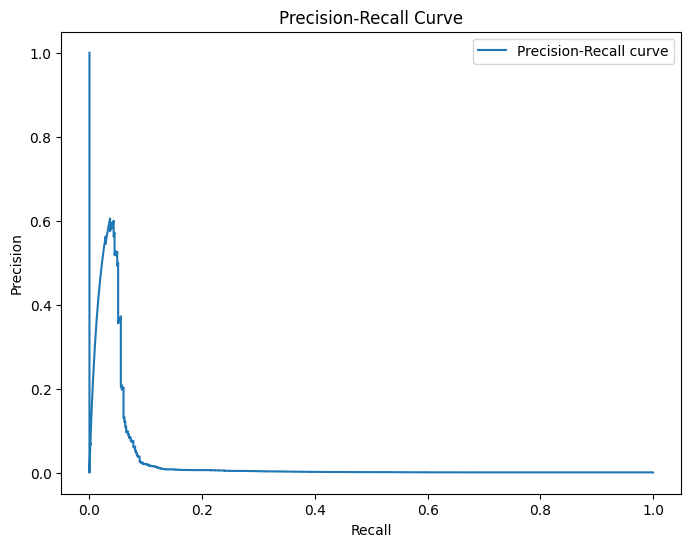

In [129]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, reconstruction_errors)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


**Based on the above confusion matrix we can evaluate that the model correctly identified 161 instances of fraud (true positives), correctly identified 704,256 instances of non-fraud (true negatives), predicted 36,930 instances as fraud, which were not (false positives) and predicted 468 instances as non-fraud, which were indeed fraud (false negatives)**

**Since these values do not particularly provide a good outcome for a real world usecase, I have decided to include cross validation and grid search for hyperparameter tuning and run the entire model again. I will include the redone code below**